In [1]:
ls --all # I have to upload on github so that's why puting Dataset in .ignore folder

 ./                               .gitignore/
 ../                              .ipynb_checkpoints/
'Amazon Reviews Analysis.ipynb'   RoBERTa-architecture.png
 .gi/


In [3]:
#cd .gitignore/ 

In [5]:
# ls # juct checking dataset files

In [38]:
import pandas as pd
import numpy as np

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

import seaborn as sb
import matplotlib.pyplot as plt

plt.style.use("ggplot")

[nltk_data] Downloading package punkt_tab to /home/dawood/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/dawood/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/dawood/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /home/dawood/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dawood/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [252]:
df = pd.read_csv(".gitignore/Reviews.csv")

In [254]:
df = df.head(10000)

In [256]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [258]:
df.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
9990,9991,B000P41A28,A82CL6H9NWSJC,Carl Nothnagel,6,8,5,1302652800,"Baby loves, and so do we","Great product, our daughter loves this and has..."
9991,9992,B000P41A28,A181WVPZSOKTVV,GRIZZLY,12,17,5,1312675200,Good product and highest quality - I'll elabor...,This is a good product and very high-quality. ...
9992,9993,B000P41A28,A3HINZRNCW1SKA,Happy Mom,1,1,5,1326240000,Awesome Similac Organic Formula,I was NEVER going to give my children formula....
9993,9994,B000P41A28,AV3IMDC3C0F8,Miss K,1,1,5,1202256000,It's about time!,"As far as I can tell, this is the only organic..."
9994,9995,B000P41A28,A350OL4V8DV5YK,Helen Avramenko,3,4,5,1259539200,great product,I switched from Similac Advanced to Organic wh...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...
9999,10000,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [260]:
df.shape

(10000, 10)

In [262]:
df.Text[0] # just cheching text at 0 index in text column

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

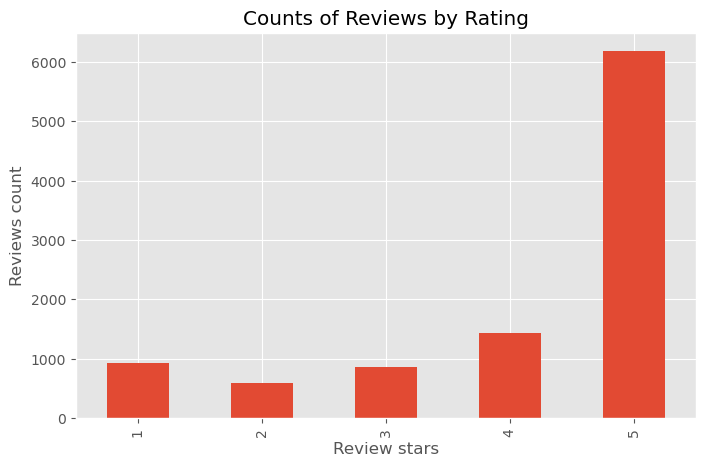

In [264]:
df.Score.value_counts().sort_index().plot(kind="bar", title = "Counts of Reviews by Rating", figsize = (8,5))
plt.xlabel("Review stars")
plt.ylabel("Reviews count")
plt.show()

In [266]:
example = df.Text[0]

In [268]:
example

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [270]:
tokens = nltk.word_tokenize(example)

In [272]:
tokens

['I',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'Vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 '.',
 'The',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 '.',
 'My',
 'Labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most',
 '.']

In [274]:
tagged_tokens = nltk.pos_tag(tokens)

In [276]:
tagged_tokens

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [278]:
entities = nltk.chunk.ne_chunk(tagged_tokens)
entities.pprint()

(S
  I/PRP
  have/VBP
  bought/VBN
  several/JJ
  of/IN
  the/DT
  (ORGANIZATION Vitality/NNP)
  canned/VBD
  dog/RP
  food/NN
  products/NNS
  and/CC
  have/VBP
  found/VBN
  them/PRP
  all/DT
  to/TO
  be/VB
  of/IN
  good/JJ
  quality/NN
  ./.
  The/DT
  product/NN
  looks/VBZ
  more/RBR
  like/IN
  a/DT
  stew/NN
  than/IN
  a/DT
  processed/JJ
  meat/NN
  and/CC
  it/PRP
  smells/VBZ
  better/RBR
  ./.
  My/PRP$
  (ORGANIZATION Labrador/NNP)
  is/VBZ
  finicky/JJ
  and/CC
  she/PRP
  appreciates/VBZ
  this/DT
  product/NN
  better/JJR
  than/IN
  most/JJS
  ./.)


In [279]:
# VERDAR Sentiment Scoring

In [282]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer() # just creating object

In [284]:
sia.polarity_scores("Hi, i am very Happy today.") # compound values are btw -1 to +1. it's aggregation of neg, neu, pos

{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound': 0.6115}

In [286]:
sia.polarity_scores("Hi, i am very sad today.") # compound values are btw -1 to +1. it's aggregation of neg, neu, pos

{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5256}

In [288]:
sia.polarity_scores(example) # compound values are btw -1 to +1. it's aggregation of neg, neu, pos

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [290]:
# now run over the whole dataset

results = {}
for index, row in tqdm(df.iterrows(), total = len(df)):
    text = row.Text
    id_of_review = row.Id

    results[id_of_review] = sia.polarity_scores(text)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [374]:
# for i in results.items():
#     print(i)

In [294]:
new_df = pd.DataFrame(results).T # to flop horizontally

In [296]:
new_df = new_df.reindex().rename(columns={"index":"Id"})

In [298]:
new_df = new_df.merge(df, how="left", left_index=True, right_index=True)

In [300]:
new_df

,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,0.000,0.695,0.305,0.9441,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.138,0.862,0.000,-0.5664,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.091,0.754,0.155,0.8265,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,0.000,1.000,0.000,0.0000,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
5,0.000,0.552,0.448,0.9468,6.0,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.089,0.852,0.059,-0.5267,9997.0,B000P41A28,A5VVRGL8JA7R,Adam,2.0,3.0,5.0,1.306368e+09,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,0.091,0.747,0.162,0.6808,9998.0,B000P41A28,A2TGDTJ8YCU6PD,geena77,0.0,0.0,5.0,1.347494e+09,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,0.063,0.811,0.126,0.9305,9999.0,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1.0,2.0,5.0,1.203638e+09,very convenient,i love the fact that i can get this delieved t...
9999,0.149,0.697,0.154,0.2809,10000.0,B000P41A28,A82WIMR4RSVLI,Emrose mom,0.0,1.0,4.0,1.337472e+09,The best weve tried so far,We have a 7 week old... He had gas and constip...


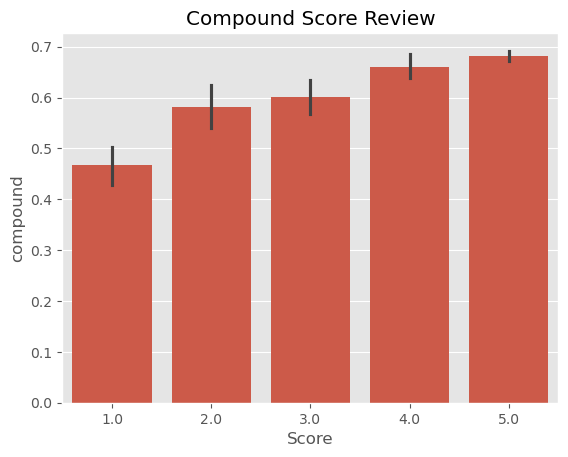

In [302]:
plot=sb.barplot(data= new_df, x = "Score", y = "compound")
plt.title("Compound Score Review")
plt.show()

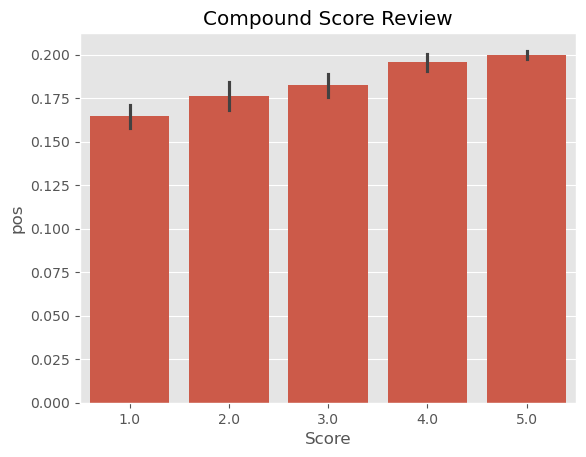

In [303]:
plot=sb.barplot(data= new_df, x = "Score", y = "pos")
plt.title("Compound Score Review")
plt.show()

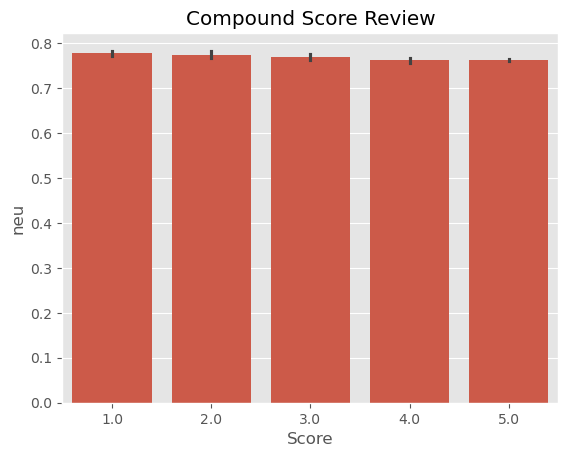

In [305]:
plot=sb.barplot(data= new_df, x = "Score", y = "neu")
plt.title("Compound Score Review")
plt.show()

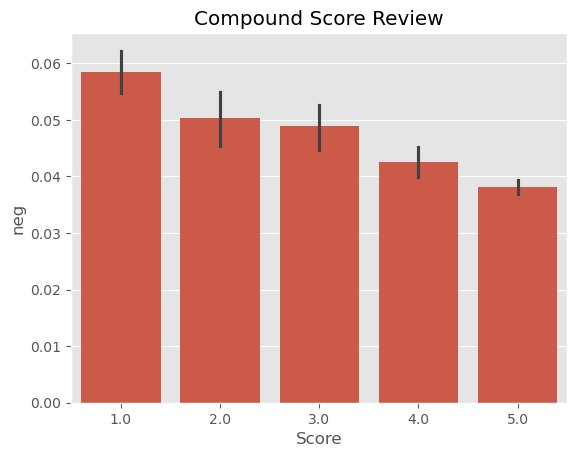

In [306]:
plot=sb.barplot(data= new_df, x = "Score", y = "neg")
plt.title("Compound Score Review")
plt.show()

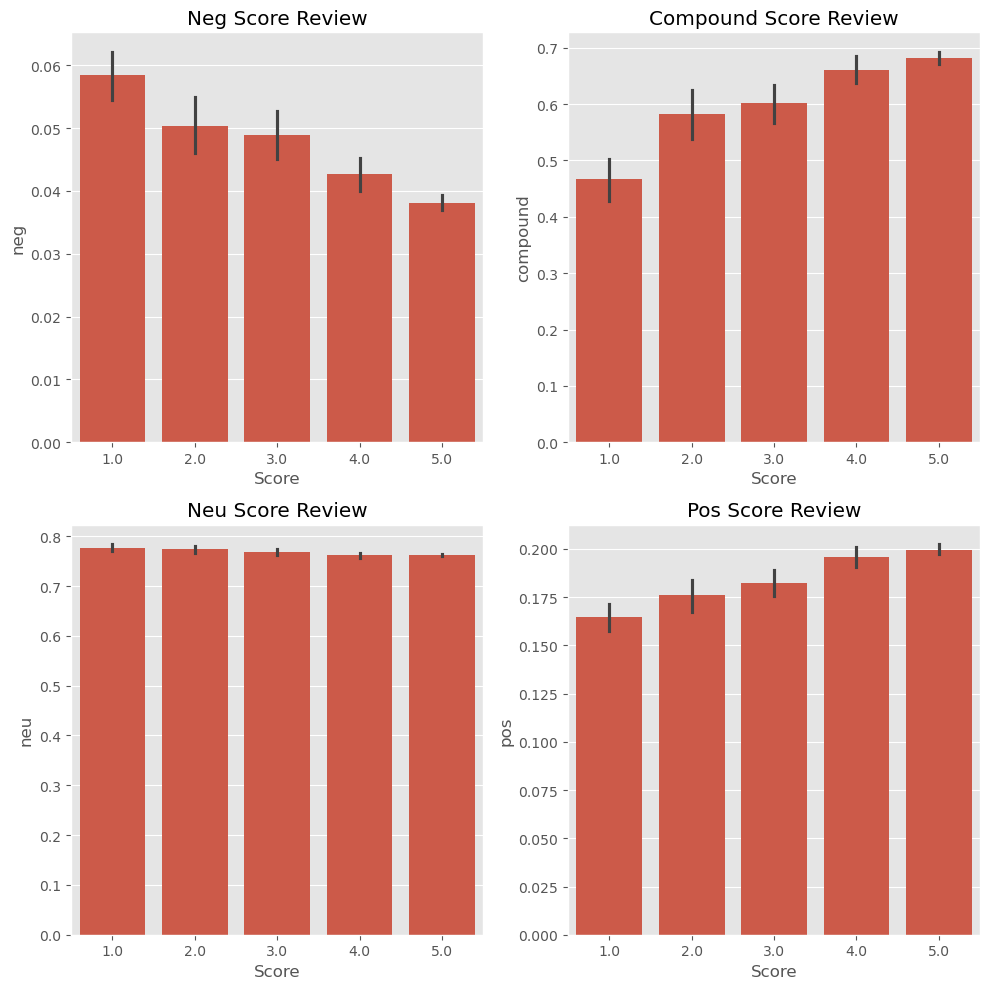

In [308]:
# Assuming `new_df` is already defined
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Create 2x2 grid

# Plot the bar charts
sb.barplot(data=new_df, x="Score", y="neg", ax=axs[0, 0])
axs[0, 0].set_title("Neg Score Review")

sb.barplot(data=new_df, x="Score", y="compound", ax=axs[0, 1])
axs[0, 1].set_title("Compound Score Review")

sb.barplot(data=new_df, x="Score", y="neu", ax=axs[1, 0])
axs[1, 0].set_title("Neu Score Review")

sb.barplot(data=new_df, x="Score", y="pos", ax=axs[1, 1])
axs[1, 1].set_title("Pos Score Review")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [310]:
# RoBERTa

In [311]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [313]:
model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [314]:
print(example)
sia.polarity_scores(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [315]:
encoded_text = tokenizer(example, return_tensors="pt")

In [319]:
encoded_text

{'input_ids': tensor([[    0,   100,    33,  2162,   484,     9,     5, 23911,  1571, 24623,
          2335,   689,   785,     8,    33,   303,   106,    70,     7,    28,
             9,   205,  1318,     4,    20,  1152,  1326,    55,   101,    10,
         24571,    87,    10, 12069,  4884,     8,    24, 28078,   357,     4,
          1308, 26882,    16,  8746, 14963,     8,    79, 14137,  1626,    42,
          1152,   357,    87,  1437,   144,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [320]:
output = model(**encoded_text)

In [321]:
score = output[0][0].detach().numpy()

In [322]:
score

array([-2.0115304, -0.711452 ,  2.4868224], dtype=float32)

In [323]:
score = softmax(score)

In [324]:
score

array([0.01057769, 0.03881574, 0.9506066 ], dtype=float32)

In [325]:
score_dic = {
    "Neg" : score[0],
    "Neu" : score[1],
    "Pos" : score[2]
}

In [326]:
score_dic

{'Neg': 0.010577693, 'Neu': 0.038815744, 'Pos': 0.9506066}

In [330]:
def roberta_score(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)

    score_dic = {
    'roberta_neg' : score[0],
    'roberta_neu' : score[1],
    'roberta_pos' : score[2]
    }

    return score_dic
    
    

In [332]:
roberta_score(example)

{'roberta_neg': 0.010577693,
 'roberta_neu': 0.038815744,
 'roberta_pos': 0.9506066}

In [340]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_score(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583
Broke for id 5040
Broke for id 5182
Broke for id 5192
Broke for id 5365
Broke for id 5442
Broke for id 5709
Broke for id 5998
Broke for id 6003
Broke for id 6007
Broke for id 6106
Broke for id 6234
Broke for id 6558

In [341]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [343]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

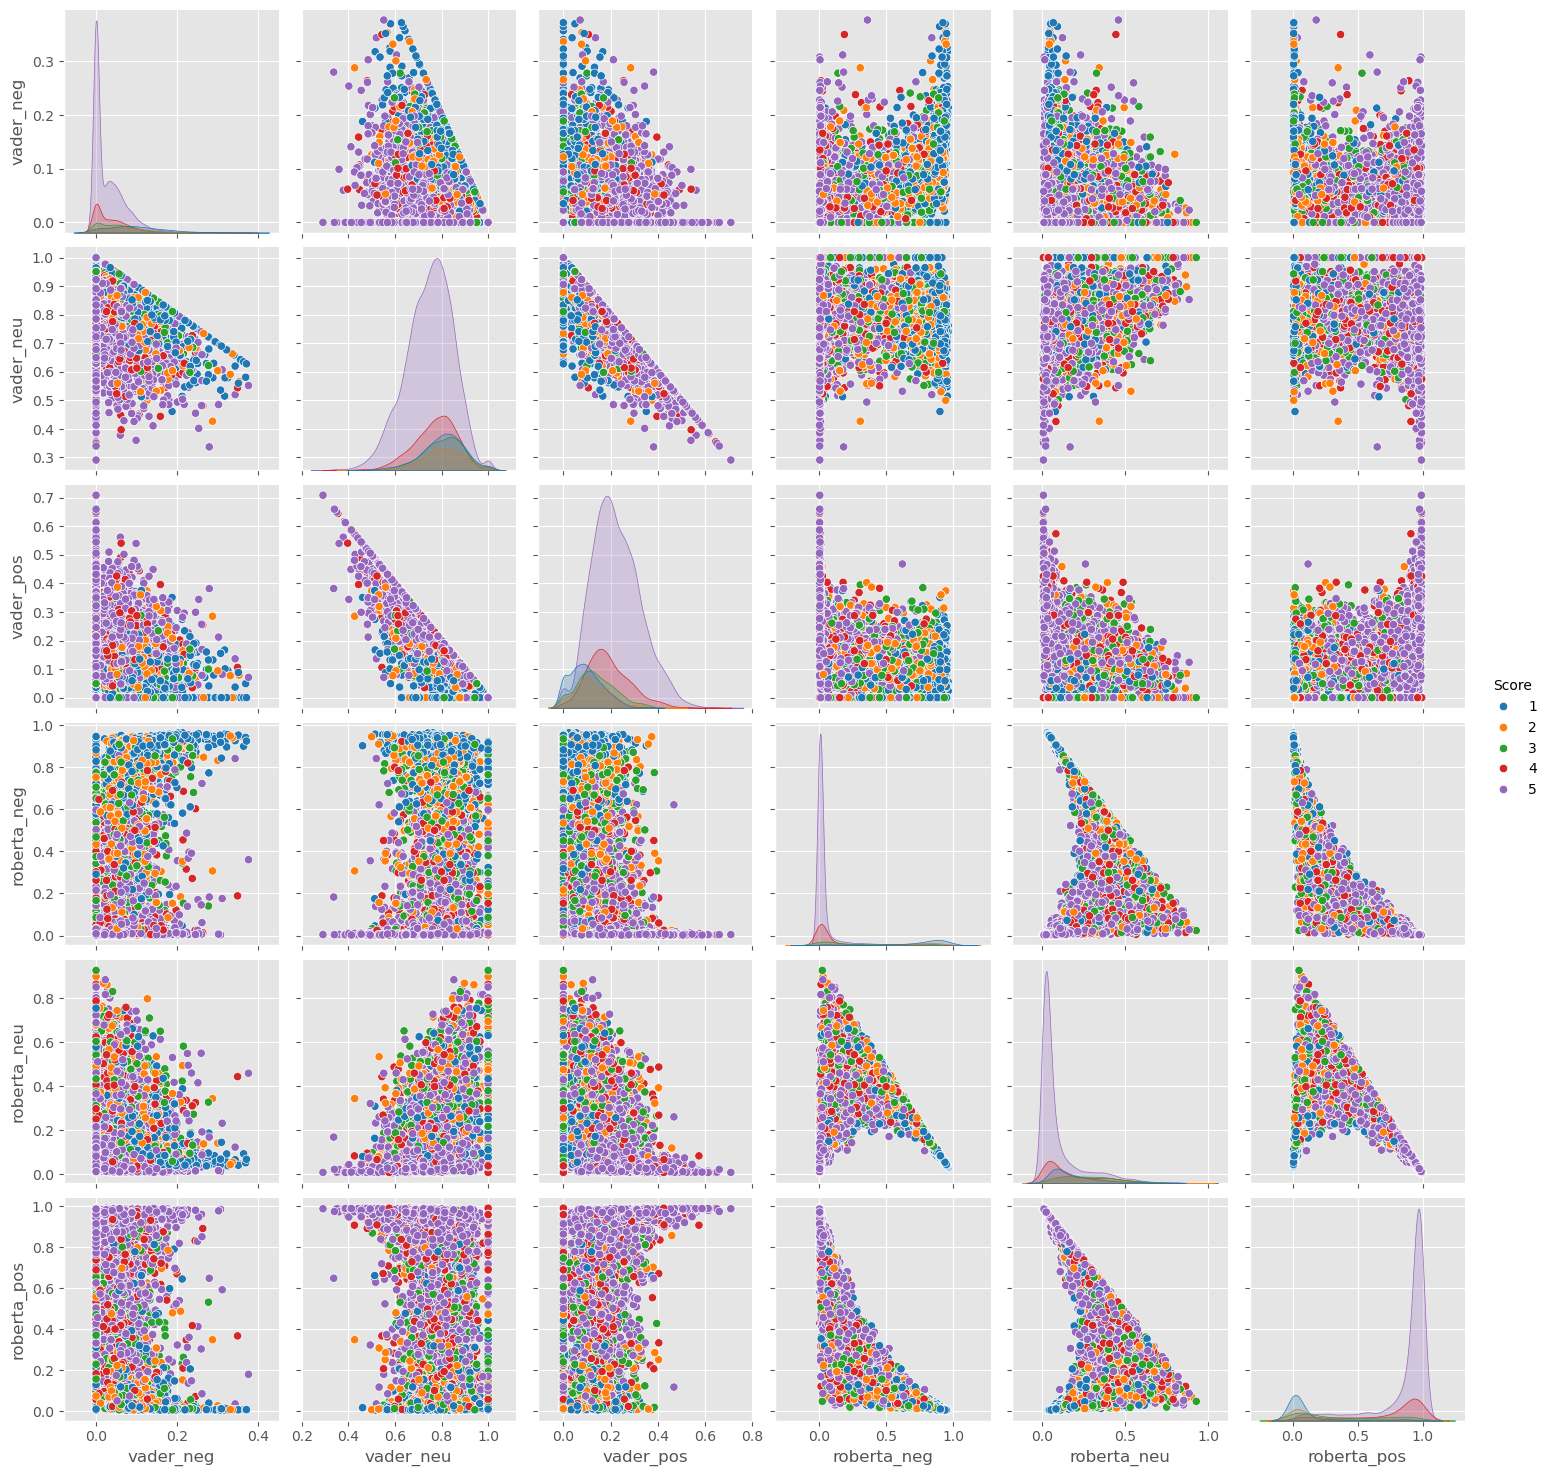

In [344]:
sb.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [347]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [348]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [349]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [350]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

In [351]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [352]:
sent_pipeline('I love to coding!')

[{'label': 'POSITIVE', 'score': 0.999782145023346}]

In [353]:
sent_pipeline('Make sure you have completed your task!')


[{'label': 'POSITIVE', 'score': 0.9997491240501404}]